In [18]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data=pd.read_csv('marketing_customer_analysis.csv')

In [19]:
summary=data.describe().T

In [20]:
numerical =  data.select_dtypes(include=[np.number])
category =  data.select_dtypes(include=[np.object])


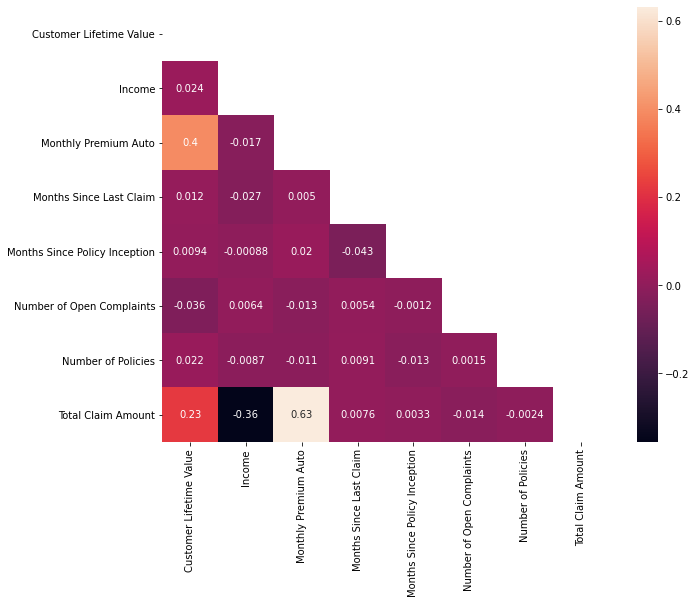

In [21]:
correlations_matrix = numerical.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [22]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
y = data['Total Claim Amount']
x = data.drop(['Total Claim Amount'], axis=1)

In [23]:
x_num = x.select_dtypes(include=[np.number])

In [24]:
x_cat = x.select_dtypes(include=[np.object])

In [25]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
transformer = Normalizer().fit(x_num)
x_normalized = transformer.transform(x_num)
x_normalized.shape

(9134, 7)

In [26]:
x_num_norm=pd.DataFrame(x_normalized)
x_num_norm.head()

,0,1,2,3,4,5,6
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023


In [27]:
x_num_norm.columns=x_num.columns
x_num_norm.head()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023


In [28]:

from sklearn.preprocessing import OneHotEncoder


en_x = OneHotEncoder(handle_unknown='ignore') #en_gender=array where gender will be encoded to bools
en_x.fit(x_cat) #categorical=where column gender is stored
#OneHotEncoder(handle_unknown='ignore')
en_x.categories_

en_x_array=en_x.transform(x_cat).toarray()
en_x_array


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [29]:
x_cat_en=pd.DataFrame(en_x_array)


In [ ]:
x_cat_en

In [14]:
x_cat_en.head()

KeyboardInterrupt: 

In [ ]:
x_new=pd.concat([x_num_norm,x_cat_en],axis=1)
print(x_new.shape)